In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
epl_15_16_matches = pd.read_csv('england-premier-league-matches-2015-to-2016-stats.csv')
epl_16_17_matches = pd.read_csv('england-premier-league-matches-2016-to-2017-stats.csv')
epl_17_18_matches = pd.read_csv('england-premier-league-matches-2017-to-2018-stats.csv')
epl_18_19_matches = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv')
epl_19_20_matches = pd.read_csv('england-premier-league-matches-2019-to-2020-stats.csv')

In [3]:
epl_15_20_matches = pd.concat([epl_15_16_matches, epl_16_17_matches, 
                               epl_17_18_matches,epl_18_19_matches, epl_19_20_matches], axis=0)

In [4]:
epl_15_20_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 379
Data columns (total 64 columns):
timestamp                              1900 non-null int64
date_GMT                               1900 non-null object
status                                 1900 non-null object
attendance                             1868 non-null float64
home_team_name                         1900 non-null object
away_team_name                         1900 non-null object
referee                                1165 non-null object
Game Week                              1900 non-null int64
Pre-Match PPG (Home)                   1900 non-null float64
Pre-Match PPG (Away)                   1900 non-null float64
home_ppg                               1900 non-null float64
away_ppg                               1900 non-null float64
home_team_goal_count                   1900 non-null int64
away_team_goal_count                   1900 non-null int64
total_goal_count                       1900 non-null 

In [5]:
epl_15_16_teams = pd.read_csv('england-premier-league-teams-2015-to-2016-stats.csv')
epl_16_17_teams = pd.read_csv('england-premier-league-teams-2016-to-2017-stats.csv')
epl_17_18_teams = pd.read_csv('england-premier-league-teams-2017-to-2018-stats.csv')
epl_18_19_teams = pd.read_csv('england-premier-league-teams-2018-to-2019-stats.csv')
epl_19_20_teams = pd.read_csv('england-premier-league-teams-2019-to-2020-stats.csv')

In [6]:
epl_15_20_teams = pd.concat([epl_15_16_teams, epl_16_17_teams, 
                               epl_17_18_teams,epl_18_19_teams, epl_19_20_teams], axis=0)

In [7]:
epl_15_20_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 293 entries, team_name to over145_corners_percentage
dtypes: float64(36), int64(253), object(4)
memory usage: 229.7+ KB


In [8]:
epl_15_16_teams2 = pd.read_csv('england-premier-league-teams2-2015-to-2016-stats.csv')
epl_16_17_teams2 = pd.read_csv('england-premier-league-teams2-2016-to-2017-stats.csv')
epl_17_18_teams2 = pd.read_csv('england-premier-league-teams2-2017-to-2018-stats.csv')
epl_18_19_teams2 = pd.read_csv('england-premier-league-teams2-2018-to-2019-stats.csv')
epl_19_20_teams2 = pd.read_csv('england-premier-league-teams2-2019-to-2020-stats.csv')

In [9]:
epl_15_20_teams2 = pd.concat([epl_15_16_teams2, epl_16_17_teams2, 
                               epl_17_18_teams2,epl_18_19_teams2, epl_19_20_teams2], axis=0)

In [10]:
epl_15_20_teams2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 442 entries, team_name to failed_to_score_2h_away
dtypes: float64(42), int64(396), object(4)
memory usage: 346.1+ KB


In [11]:
epl_15_20_matches.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1439034300,Aug 08 2015 - 11:45am,complete,NaN,Manchester United,Tottenham Hotspur,Jonathan Moss,1,0.0,0.0,...,1.72,4.00,5.11,0.0,0.0,0.0,0.0,0.0,0.0,Old Trafford (Manchester)
1,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,AFC Bournemouth,Aston Villa,Mark Clattenburg,1,0.0,0.0,...,2.38,3.38,3.23,0.0,0.0,0.0,0.0,0.0,0.0,Vitality Stadium (Bournemouth- Dorset)
2,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Norwich City,Crystal Palace,Simon Hooper,1,0.0,0.0,...,2.50,3.38,3.03,0.0,0.0,0.0,0.0,0.0,0.0,Carrow Road (Norwich- Norfolk)
3,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Leicester City,Sunderland,Lee Mason,1,0.0,0.0,...,2.18,3.36,3.71,0.0,0.0,0.0,0.0,0.0,0.0,King Power Stadium (Leicester- Leicestershire)
4,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Everton,Watford,Mike Jones,1,0.0,0.0,...,1.75,3.86,5.16,0.0,0.0,0.0,0.0,0.0,0.0,Goodison Park (Liverpool)


In [12]:
conditions = [
    (epl_15_20_matches['home_team_goal_count'] == epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] > epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] < epl_15_20_matches['away_team_goal_count'])
]

# create a list of the values we want to assign for each condition
values = ['D', 'H', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
epl_15_20_matches['match_result'] = np.select(conditions, values)

epl_15_20_matches[['home_team_goal_count','away_team_goal_count','match_result']].head()

,home_team_goal_count,away_team_goal_count,match_result
0,1,0,H
1,0,1,A
2,1,3,A
3,4,2,H
4,2,2,D


Text(0.5, 1.0, 'Match Result')

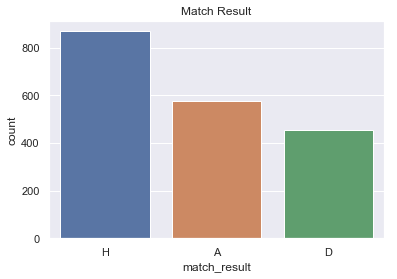

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(x="match_result", data=epl_15_20_matches)
plt.title('Match Result')

In [20]:
epl_15_20_matches['year'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).year
epl_15_20_matches['month'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).month

In [85]:
epl_15_20_matches['season'] = np.where(epl_15_20_matches['month'] >= 8, 
                                       epl_15_20_matches['season_add'],
                                       epl_15_20_matches['season_minus'])

In [90]:
epl_15_20_matches.drop('points_diff', axis=1, inplace=True)

In [88]:
epl_15_20_matches[['year','month','season']].head()

,year,month,season
0,2015,8,2015/2016
1,2015,8,2015/2016
2,2015,8,2015/2016
3,2015,8,2015/2016
4,2015,8,2015/2016


In [93]:
top_features = ['Game Week','Pre-Match PPG (Home)','Pre-Match PPG (Away)']
epl_15_20_matches_top_features = epl_15_20_matches[top_features]
#epl_15_20_matches_top_features.head()
#sns.pairplot(USAhousing)